In [1]:
import numpy as np
import matplotlib
from matplotlib import colormaps
import matplotlib.pyplot as plt
from skimage import exposure, data 

In [2]:
INPUT_PATH = "/home/Kia/UCAIR_01/data/model_exp_key/Jason_318d04b/img_46.png"
jason_img_46 = plt.imread(INPUT_PATH)

In [3]:
PRED_PATH = "/home/Kia/UCAIR_01/data/model_exp_key/Jason_318d04b/prediction_46.png"
jason_pred_46 = plt.imread(PRED_PATH)

In [4]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, colorizer: 'Colorizer | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba', 'auto'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.

    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    

In [5]:
sorted(list(colormaps))

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Grays',
 'Grays_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'berlin',
 'berlin_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'ci

In [6]:
import matplotlib.colors as colors

In [7]:
help(colors.BoundaryNorm)

Help on class BoundaryNorm in module matplotlib.colors:

class BoundaryNorm(Normalize)
 |  BoundaryNorm(boundaries, ncolors, clip=False, *, extend='neither')
 |
 |  Generate a colormap index based on discrete intervals.
 |
 |  Unlike `Normalize` or `LogNorm`, `BoundaryNorm` maps values to integers
 |  instead of to the interval 0-1.
 |
 |  Method resolution order:
 |      BoundaryNorm
 |      Normalize
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __call__(self, value, clip=None)
 |      This method behaves similarly to `.Normalize.__call__`, except that it
 |      returns integers or arrays of int16.
 |
 |  __init__(self, boundaries, ncolors, clip=False, *, extend='neither')
 |      Parameters
 |      ----------
 |      boundaries : array-like
 |          Monotonically increasing sequence of at least 2 bin edges:  data
 |          falling in the n-th bin will be mapped to the n-th color.
 |
 |      ncolors : int
 |          Number of colors in the colormap to be used.
 |

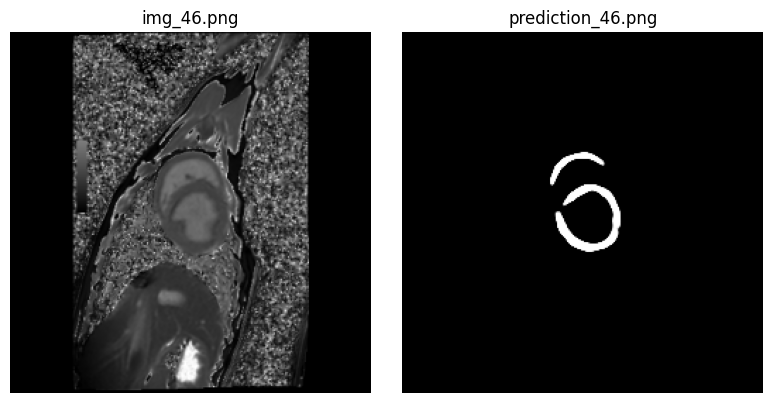

In [8]:
input_title = INPUT_PATH.split('/')[-1]
pred_title = PRED_PATH.split('/')[-1]

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

ax = ax.flatten()
cmap = 'binary_r'

ax[0].imshow(jason_img_46, cmap)
ax[0].set_title(f'{input_title}')
ax[0].axis('off')

ax[1].imshow(jason_pred_46, cmap)
ax[1].set_title(f'{pred_title}')
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [9]:
type(jason_img_46)

numpy.ndarray

In [10]:
type(jason_pred_46)

numpy.ndarray

In [11]:
type(jason_img_46[100, 100])

numpy.float32

In [12]:
min(jason_img_46.flatten())

np.float32(0.0)

In [13]:
max(jason_img_46.flatten())

np.float32(0.9957122)

In [25]:
jason_img_46.flatten().max()

np.float32(0.9957122)

In [14]:
min(jason_pred_46.ravel())

np.float32(0.0)

In [15]:
max(jason_pred_46.flatten())

np.float32(1.0)

In [16]:
rand_input_pixel = jason_img_46[100, 100]
float(rand_input_pixel)

0.26233309507369995

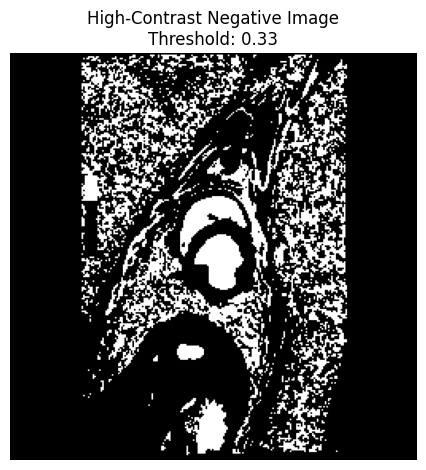

In [17]:
threshold = 0.33
binary_negative_img = (jason_img_46 >= threshold).astype(float)
plt.imshow(binary_negative_img, cmap='gray')
plt.axis('off')
plt.title(f'High-Contrast Negative Image\nThreshold: {threshold}')
plt.tight_layout()
plt.show()

In [18]:
import os
import re

In [19]:
def natural_sort_key(s):
    """Extracts numbers from filenames for natural sorting (e.g., img_10 after img_2)."""
    return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', s)]

def spot_non_float_images(folder_path):
    """
    Scans a folder for images, detects non-float arrays, and prints their details.
    
    Args:
        folder_path (str): Path to the folder containing image files.
    """
    valid_extension = '.png'
    non_float_images = []  # Store filenames of non-float images
    img_count = 0          # Count of images containing "img"
    pred_count = 0         # Count of images containing "prediction"

    # Get all valid image files and sort them naturally
    image_files = sorted(
        [f for f in os.listdir(folder_path) if f.lower().endswith(valid_extension)],
        key=natural_sort_key
    )

    for filename in image_files:
        img_path = os.path.join(folder_path, filename)
        img = plt.imread(img_path)  # Load image
        
        # Extract dtype and min-max values for better insight
        img_dtype = img.dtype
        img_min, img_max = img.min(), img.max()
        
        # Print relevant details
        print(f"File: {filename}")
        print(f" - Data Type: {img_dtype}")
        print(f" - Min Value: {img_min:.4f}, Max Value: {img_max:.4f}")

        # Check if the image is already float type
        if not np.issubdtype(img_dtype, np.floating):
            print("   -> Non-float detected! Needs rescaling if used for processing.")
            non_float_images.append(filename)  # Track non-float images
        print("-" * 50)  # Separator for readability

        # Count filenames containing specific substrings
        if "img" in filename.lower():
            img_count += 1
        if "prediction" in filename.lower():
            pred_count += 1

    # Summary message
    if non_float_images:
        print(f"\nFound {len(non_float_images)} non-float images:")
        for img_name in sorted(non_float_images, key=natural_sort_key):  # Ensure sorted output
            print(f" - {img_name}")
    else:
        print("\nAll images are already in float format.")

    # Display counts for "img" and "prediction"
    print(f"\nTotal images containing 'img': {img_count}")
    print(f"Total images containing 'prediction': {pred_count}")


In [20]:
jason_folder = "/home/Kia/UCAIR_01/data/model_exp_key/Jason_318d04b"
spot_non_float_images(jason_folder)

File: img_0.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 0.9778
--------------------------------------------------
File: img_1.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 0.9395
--------------------------------------------------
File: img_2.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 0.9024
--------------------------------------------------
File: img_3.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 0.8827
--------------------------------------------------
File: img_4.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 0.9821
--------------------------------------------------
File: img_5.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 0.8830
--------------------------------------------------
File: img_6.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 0.9472
--------------------------------------------------
File: img_7.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 0.8611
-------------------

File: img_58.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 0.9048
--------------------------------------------------
File: img_59.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 0.8937
--------------------------------------------------
File: prediction_0.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 1.0000
--------------------------------------------------
File: prediction_1.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 1.0000
--------------------------------------------------
File: prediction_2.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 1.0000
--------------------------------------------------
File: prediction_3.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 1.0000
--------------------------------------------------
File: prediction_4.png
 - Data Type: float32
 - Min Value: 0.0000, Max Value: 1.0000
--------------------------------------------------
File: prediction_5.png
 - Data Type: float32
 - Min Value: 0

In [21]:
jason_pred_21 = "/home/Kia/UCAIR_01/data/model_exp_key/Jason_318d04b/prediction_21.png"
jason_pred_26 = "/home/Kia/UCAIR_01/data/model_exp_key/Jason_318d04b/prediction_26.png"

In [28]:
jason_img_21 = "/home/Kia/UCAIR_01/data/model_exp_key/Jason_318d04b/img_21.png"
jason_img_26 = "/home/Kia/UCAIR_01/data/model_exp_key/Jason_318d04b/img_26.png"

In [29]:
def inspect_pred_image(img_path):

    img = plt.imread(img_path)
    img_min, img_max = img.min(), img.max()
    
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(f"{img_path.split('/')[-1]}\nMin Value: {img_min:.4f}\nMax Value: {img_max:.4f}")
    plt.tight_layout()
    plt.show()

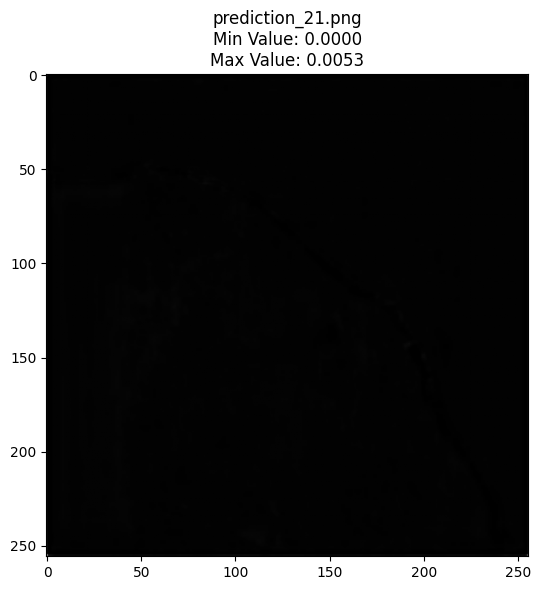

In [30]:
inspect_pred_image(jason_pred_21)

In [ ]:
def inspect_bad_input_imgs(input_img_path):

    img = plt.imread(input_img_path)
    img_min, img_max = img.min(), img.max()

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot image
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(f"{input_img_path.split('/')[-1]}\nMin Pixel Value: {img_min}\nMax Pixel Value: {img_max:.4f}")
    ax[0].axis('off')

    # Plot hist of pixel intensities
    ax[1].hist(img.flatten(), bins=50, color='gray', edgecolor='black')
    ax[1].set_title("Histogram of Pixel Intensities")
    ax[1].set_xlabel("Pixel Intensity")
    ax[1].set_ylabel("Frequency")
    ax[1].set_xlim([0, 1])  # Since values should be between 0 and 1

    plt.tight_layout()
    plt.show()

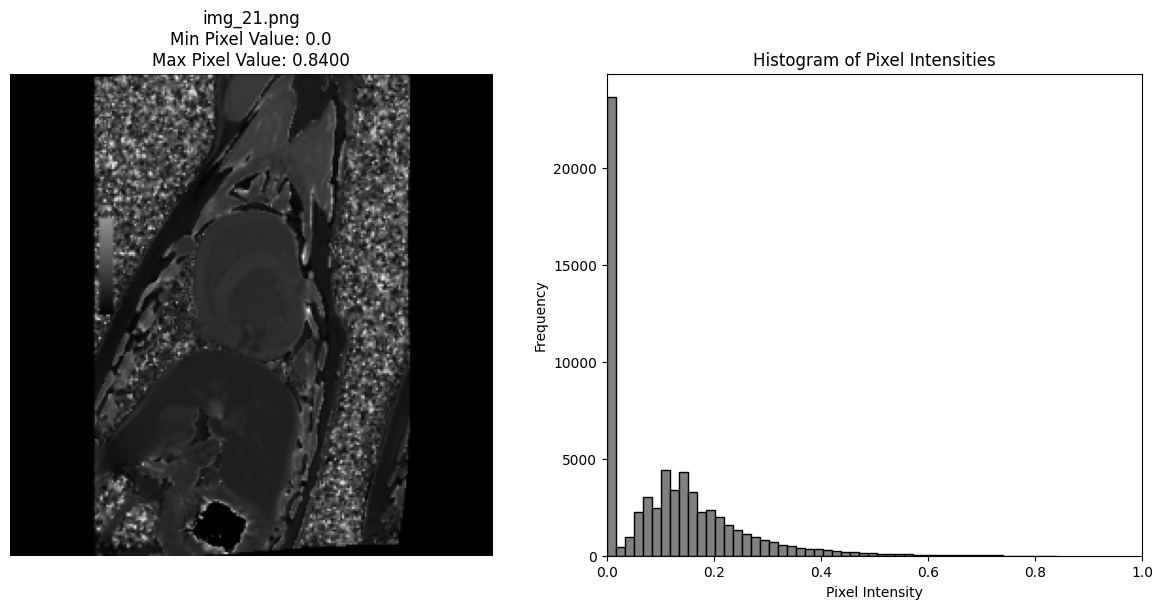

In [36]:
inspect_bad_input_imgs(jason_img_21)

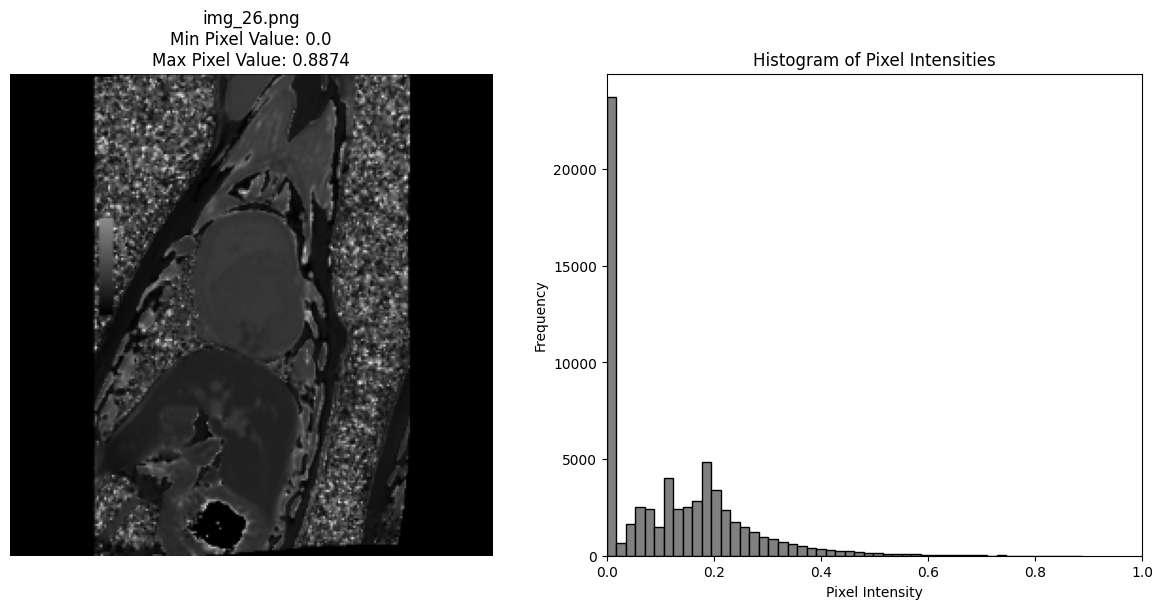

In [37]:
inspect_bad_input_imgs(jason_img_26)

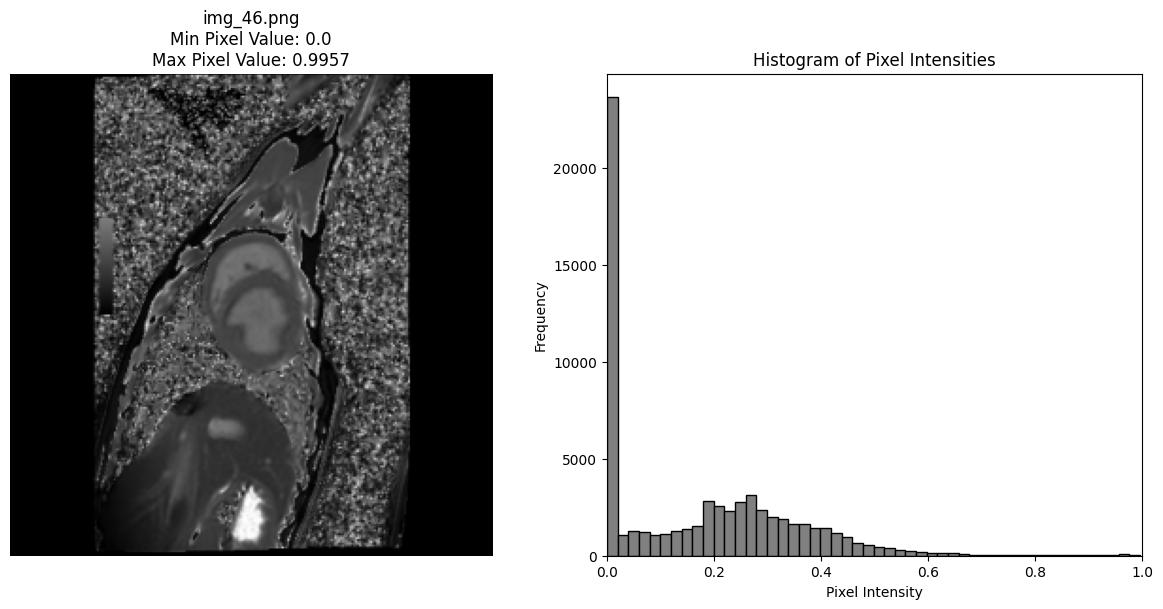

In [40]:
inspect_bad_input_imgs(INPUT_PATH) # jason img 46 

In [41]:
# ndimage's label function is used for CCA in binary images, after labeling components extract the largest one
from scipy import ndimage 

Steps to Implement:

1. Threshold the Prediction Image: Since connected component analysis works on binary images, we first need to threshold the image. We'll set a threshold (e.g., 0.5) to create a binary mask.

2. Apply Connected Component Labeling: Use scipy.ndimage.label to find all connected components in the thresholded image.

3. Find the Largest Component: Extract the largest component based on the number of pixels it contains.

4. Visualize the Largest Component: We can overlay the largest component on the original image or simply plot it.

In [42]:
def extract_largest_component(img_path, threshold=0.5):

    img = plt.imread(img_path)  
 
    binary_img = img > threshold  # Binary mask: True for pixels greater than threshold 
    
    # Step 2: CC labeling
    labeled_img, num_features = ndimage.label(binary_img)  
    
    # Step 3: Find the largest component based on number of pixels
    component_sizes = [np.sum(labeled_img == i) for i in range(1, num_features + 1)]
    largest_component_label = np.argmax(component_sizes) + 1  # Labels are 1-based
    
    # Step 4: Extract the largest component
    largest_component = (labeled_img == largest_component_label)
    
    # Plot the original image and the largest component
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(f"Original Image: {img_path.split('/')[-1]}")
    ax[0].axis('off')  
    
    ax[1].imshow(largest_component, cmap='gray')
    ax[1].set_title(f"Largest Component")
    ax[1].axis('off')  
    
    plt.tight_layout()
    plt.show()



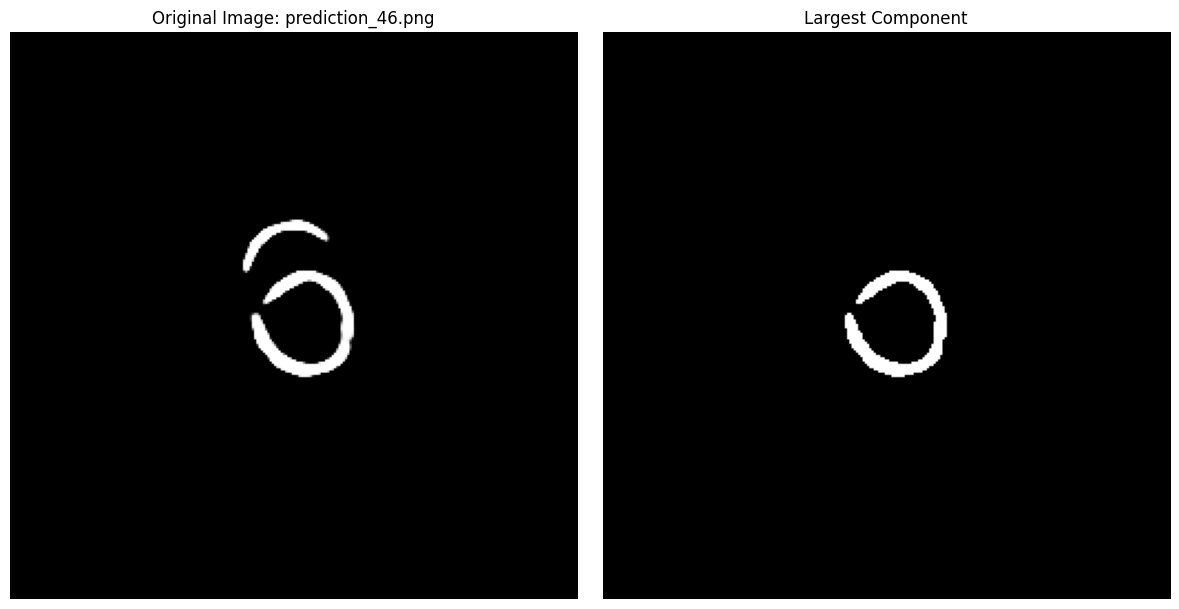

In [44]:
extract_largest_component(PRED_PATH) # jason pred 46